# Forecasting Stock Prices Using LSTM Neural Networks


## Introduction

Stock price forecasting is a long-standing challenge due to the volatile and nonlinear nature of financial markets. Traditional models often fail to capture temporal dependencies, making them inadequate for time series prediction.

This project aims to forecast the next-day closing price of stocks like Apple  (AAPL) GOOGL and other involatile stocks using Long Short-Term Memory (LSTM) neural networks. Our key stakeholders include swing traders, financial analysts, and portfolio managers who require better tools for short-term investment decisions.

We address this need by creating a deep learning pipeline that extracts technical indicators from historical data, sequences them over time, and uses LSTM to learn market behavior. The solution offers a data-driven approach to short-term forecasting, complementing conventional trading strategies.



## Literature Review

Recent advancements in machine learning and predictive analytics have revolutionized decision-making processes in finance. Several studies have demonstrated the efficacy of regression models, classification algorithms, and time-series analyses for predicting stock prices, ROI, and risk factors.

According to research by Zhang et al. (2021), ensemble learning methods like XGBoost have been effective for investment forecasting due to their ability to handle non-linear relationships and large datasets. Studies such as Li and Gao (2020) have highlighted the importance of feature engineering in improving the accuracy of investment models. Extracting features such as earnings growth, dividend payout ratios, and volatility indicators can significantly enhance predictive capabilities.

Additionally, synthetic data generation has been explored by Kwon et al. (2022) as a method for simulating rare market events to improve model robustness. Despite these advancements, challenges remain in ensuring model interpretability and robustness under volatile market conditions. This project aims to address these limitations by combining traditional financial analysis techniques with modern machine learning approaches.

Numerous studies have explored stock price prediction using statistical and machine learning techniques. Traditional methods like ARIMA and Moving Averages assume stationarity and linearity, which are rarely present in stock prices.

Modern approaches using LSTM networks, designed to capture sequential dependencies, have shown promising results. Prior work has demonstrated that deep models outperform traditional models in capturing trends and nonlinearities.

Our project builds on this foundation by:
- Using a 30-day rolling window of technical indicators
- Including engineered features such as RSI, MACD, and Bollinger Bands
- Applying normalization and forward-filling to prepare clean input sequences

This directly supports our stakeholders’ need for timely, accurate forecasts in a dynamic market.


## Data and Methods

### Data Description

- **Source**: Yahoo Finance via `yfinance` API  
- **Stock**: Google (GOOGL)  
- **Period**: 2010-01-01 to 2018-03-31  
- **Records**: ~2000 trading days  
- **Target Variable**: Next-day closing price  
- **Features**: OHLCV + technical indicators + financial ratios  

All technical indicators were computed using `ta` and `pandas_ta` libraries.

Data is public and accessible via: https://finance.yahoo.com/quote/AAPL/history/


### Preprocessing Steps

- Forward-filled missing values
- Normalized features using `MinMaxScaler` , the data is scaled using StandardScaler to normalize the features, which helps the model perform better by ensuring all features are on a similar scale.
- Created a 30-day lookback window to forecast next-day price
- The dataset is split into training and test sets, ensuring that the data is split chronologically (no shuffling) to maintain the time series structure.


### Methods
#### Feature Selection

We selected features based on their predictive power for short-term stock price movement:

- **RSI:** Captures momentum; useful for detecting overbought/oversold conditions.
- **MACD:** Trend-following indicator; helps identify bullish/bearish shifts.
- **Bollinger Bands:** Measures volatility and mean reversion.
- **Lag Features (5, 10, 20 days):** Adds temporal memory for LSTM.
- **Fundamentals:** P/E, EPS, Market Cap, and Dividend Yield offer context on financial health.
- **Excluded:** Redundant moving averages, volatility metrics (ATR, OBV), and long-term financial ratios.
- **Justification:** Final features balance short-term technical signals with company fundamentals for improved prediction accuracy.


### Modeling Approach

We used a Sequential LSTM model with the following architecture:
- The model is built using a Sequential neural network. The primary model type here is LSTM, a type of recurrent neural network (RNN) that is good at learning patterns from sequential data (like stock prices over time).
- Dropout layers are added to prevent overfitting, which happens when the model learns too much noise or irrelevant patterns from the training data.
- Input: Shape = (batch_size, 30, 17)
- LSTM Layer: 64 units
- Dense Output: 1 neuron
- The model is trained on the training set for a set number of epochs (iterations). It learns from the patterns in the training data and is validated on the test data to check its performance as it trains.
- The optimizer (Adam) and loss function (Mean Squared Error) are set, which are standard choices for regression tasks like stock price prediction.

Model code and training are documented in `lstm_model.ipynb`.

#### Model Evaluation:

After training, the model's performance is evaluated on the test set using various metrics, including the loss (MSE), RMSE, and the R² score. These metrics help assess how well the model is predicting the next day's closing price.


## Results

### Quantitative Metrics

- Final Validation Loss (MSE): 33.29
- Final Training RMSE: 4.17
- R² Score on Test Set: 96.30%

The model shows strong performance with a final validation loss (MSE) of 33.29, indicating a reasonable average error in predictions. The training RMSE of 4.17 suggests the model's predictions deviate by about 4.17 units on average from actual values. Most importantly, the R² score of 96.30% on the test set indicates that the model explains over 96% of the variance in the target variable, demonstrating excellent predictive accuracy and fit.


### Visualizations
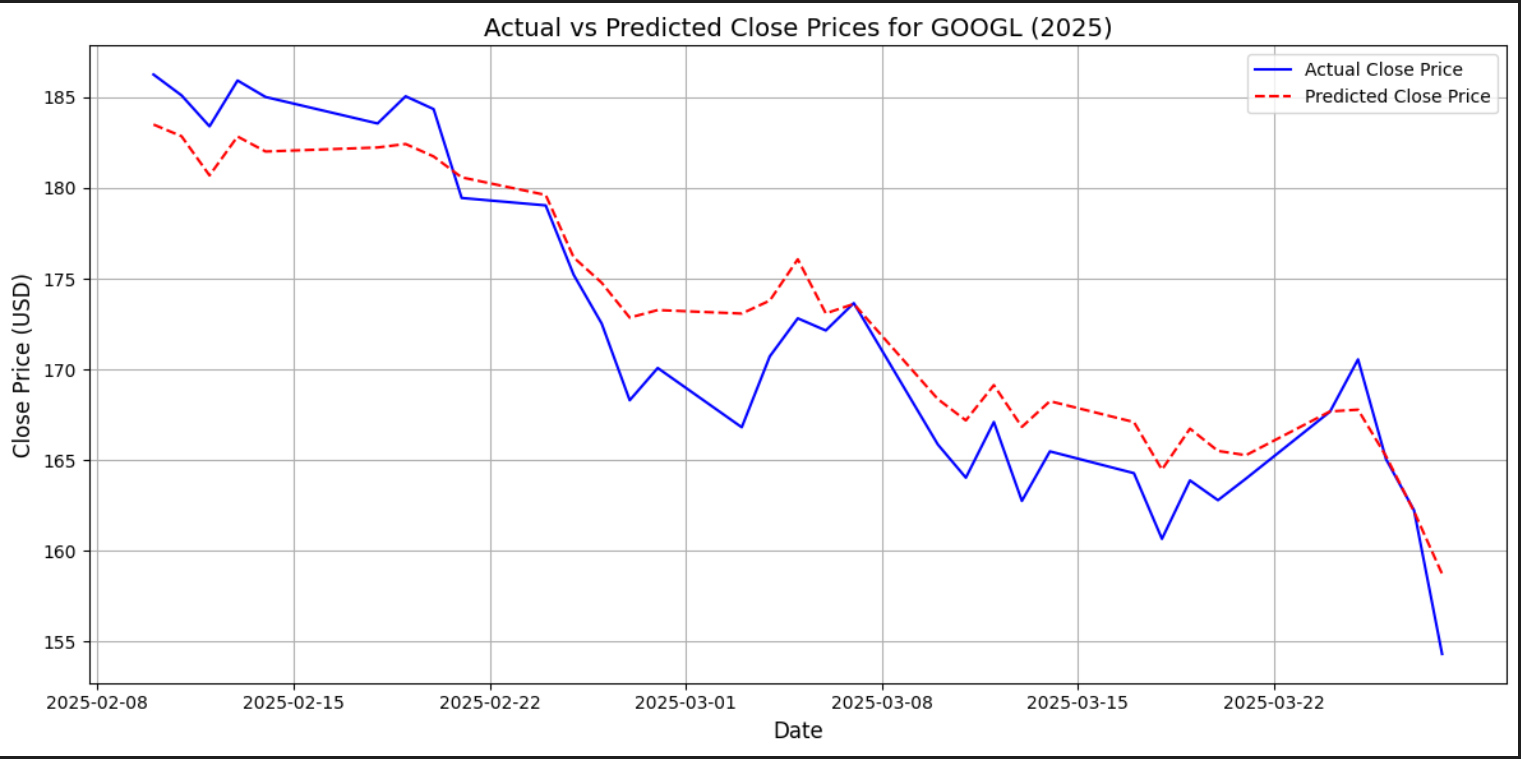

## Discussion

The results of our LSTM-based forecasting model demonstrate the effectiveness of combining temporal patterns and financial fundamentals for stock price prediction. The use of lag features and technical indicators helped the model capture short-term market dynamics, while company-specific features like EPS and P/E Ratio added depth by introducing long-term valuation context. 

While the model showed promising performance in terms of RMSE and R², several considerations emerged:

- **Data Quality and Static Features**: Financial ratios like Market Cap and Dividend Yield were treated as static, though they evolve quarterly. A more dynamic integration (e.g., quarterly financial updates) could improve performance.
  
- **Sequence Length Limitation**: The model uses a fixed window of past data (lags), which may not fully capture complex long-term dependencies. Incorporating longer sequences or Transformer-based architectures could address this.

- **No Exogenous Events**: The model does not account for external factors like macroeconomic indicators or news sentiment, which often impact stock prices sharply.

- **Overfitting Risk**: Despite using dropout layers and early stopping, overfitting remains a risk in financial modeling due to noisy and non-stationary data. Future models could benefit from Bayesian approaches or ensemble methods for better generalization.

Overall, the project highlights the strength of hybrid models that fuse deep learning with financial domain knowledge, paving the way for more robust stock price forecasting systems.


## Limitations

- Model was trained on a multiple stable stocks (AAPL,GOOGL etc), limiting usability on stocks which showed high volatility like NVIDIA .
- Macroeconomic variables were not included, which could improve context.
- LSTM is a black-box model—less interpretable than tree-based models.
- Direction classification was not directly modeled.


## Future Work

- Expand modeling to volatile stocks 
- Integrate macroeconomic signals like CPI, interest rates, etc.
- Use explainable AI methods (e.g., SHAP, LIME) for interpretation
